# Case Study 3 : Textual analysis of movie reviews

** Due Date: November 17, 2016 5:59PM**

*------------

<img src="http://www.conversational-technologies.com/nldemos/nlWordle.GIF">

**TEAM Members:** Please EDIT this cell and add the names of all the team members in your team

    Hang Ding

    Fangling Zhang

    Qingquan Zhao

    Yihao Zhou

    Tongge Zhu

**Desired outcome of the case study.**
* In this case study we will look at movie reviews from the v2.0 polarity dataset comes from
the http://www.cs.cornell.edu/people/pabo/movie-review-data.
    * It contains written reviews of movies divided into positive and negative reviews.
* As in Case Study 2 idea is to *analyze* the data set, make *conjectures*, support or refute those conjectures with *data*, and *tell a story* about the data!
    
**Required Readings:** 
* This case study will be based upon the scikit-learn Python library
* We will build upon the turtorial "Working With Text Data" which can be found at http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

**Case study assumptions:**
* You have access to a python installation

**Required Python libraries:**
* Numpy (www.numpy.org) (should already be installed from Case Study 2)
* Matplotlib (matplotlib.org) (should already be installed from Case Study 2)
* Scikit-learn (scikit-learn.org) (avaiable from Enthought Canopy)
* You are also welcome to use the Python Natural Language Processing Toolkit (www.nltk.org) (though it is not required).

** NOTE **
* Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost.

*----------------------

## Problem 1 (20 points): Complete Exercise 2: Sentiment Analysis on movie reviews from http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

* Assuming that you have downloaded the scikit-learn source code:
    * The data cane be downloaded using doc/tutorial/text_analytics/data/movie_reviews/fetch_data.py
    * A skeleton for the solution can be found in doc/tutorial/text_analytics/skeletons/exercise_02_sentiment.py
    * A completed solution can be found in doc/tutorial/text_analytics/solutions/exercise_02_sentiment.py
* **It is ok to use the solution provided in the scikit-learn distribution as a starting place for your work.**

### Modify the solution to Exercise 2 so that it can run in this iPython notebook
* This will likely involved moving around data files and/or small modifications to the script.

In [14]:
"""Build a sentiment analysis / polarity model

Sentiment analysis can be casted as a binary text classification problem,
that is fitting a linear classifier on features extracted from the text
of the user messages so as to guess wether the opinion of the author is
positive or negative.

In this examples we will use a movie review dataset.

"""
# Author: Olivier Grisel <olivier.grisel@ensta.org>
# License: Simplified BSD

import sys
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib


if __name__ == "__main__":
    # NOTE: we put the following in a 'if __name__ == "__main__"' protected
    # block to be able to use a multi-core grid search that also works under
    # Windows, see: http://docs.python.org/library/multiprocessing.html#windows
    # The multiprocessing module is used as the backend of joblib.Parallel
    # that is used when n_jobs != 1 in GridSearchCV

    # the training data folder must be passed as first argument
    categories = ['neg', 'pos']


    movie_reviews_data_folder = 'movie_reviews/txt_sentoken.2'
    dataset = load_files(movie_reviews_data_folder, categories=categories, shuffle=True)
    #print(dataset.target)
    print("n_samples: %d" % len(dataset.data))

    # split the dataset in training and test set:
    docs_train, docs_test, y_train, y_test = train_test_split(
        dataset.data, dataset.target, test_size=0.25, random_state=None)
    #print(list(y_test[:2]))
    #print(list(docs_test[:2]))


    # TASK: Build a vectorizer / classifier pipeline that\ filters out tokens
    # that are too rare or too frequent

    # from sklearn.feature_extraction.text import CountVectorizer
    # count_vect = CountVectorizer(encoding = "ISO-8859-1")
    # X_train_counts = count_vect.fit_transform(docs_train)
    # print(X_train_counts.shape)

    # from sklearn.feature_extraction.text import TfidfTransformer
    # tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
    # X_train_tf = tf_transformer.transform(X_train_counts)
    #print(X_train_tf.shape)

    pipeline = Pipeline([
        ('vect', TfidfVectorizer(decode_error='ignore',min_df=3, max_df=0.95)),
        ('clf', LinearSVC(C=1000)),
    ])


    # TASK: Build a grid search to find out whether unigrams or bigrams are
    # more useful.
    # Fit the pipeline on the training set using grid search for the parameters
    parameters = {
        'vect__ngram_range': [(1, 1), (1, 2)],
    }
    grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1)
    grid_search.fit(docs_train, y_train)

    # TASK: print the cross-validated scores for the each parameters set
    # explored by the grid search
    n_candidates = len(grid_search.cv_results_['params'])
    for i in range(n_candidates):
        print(i, 'params - %s; mean - %0.2f; std - %0.2f'
                 % (grid_search.cv_results_['params'][i],
                    grid_search.cv_results_['mean_test_score'][i],
                    grid_search.cv_results_['std_test_score'][i]))


    # TASK: Predict the outcome on the testing set and store it in a variable
    # named y_predicted
    y_predicted = grid_search.predict(docs_test)

    # Print the classification report
    print(metrics.classification_report(y_test, y_predicted,
                                         target_names=dataset.target_names))

    # # Print and plot the confusion matrix
    cm = metrics.confusion_matrix(y_test, y_predicted)
    print(cm)


  


Using matplotlib backend: MacOSX
n_samples: 2002
0 params - {'vect__ngram_range': (1, 1)}; mean - 0.83; std - 0.01
1 params - {'vect__ngram_range': (1, 2)}; mean - 0.85; std - 0.01
             precision    recall  f1-score   support

        neg       0.84      0.84      0.84       232
        pos       0.86      0.86      0.86       269

avg / total       0.85      0.85      0.85       501

[[194  38]
 [ 38 231]]


## Problem 2 (20 points): Explore the scikit-learn TfidVectorizer class

**Read the documentation for the TfidVectorizer class at http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html.** 
* Define the term frequency–inverse document frequency (TF-IDF) statistic (http://en.wikipedia.org/wiki/Tf%E2%80%93idf will likely help).
* Run the TfidVectorizer class on the training data above (docs_train).
* Explore the min_df and max_df parameters of TfidVectorizer.  What do they mean? How do they change the features you get?
* Explore the ngram_range parameter of TfidVectorizer.  What does it mean? How does it change the features you get? (Note, large values  of ngram_range may take a long time to run!)

Tf-idf stands for term frequency-inverse document frequency, and the tf-idf weight is a weight often used in information retrieval and text mining. This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus. Variations of the tf-idf weighting scheme are often used by search engines as a central tool in scoring and ranking a document's relevance given a user query.

TF: Term Frequency, which measures how frequently a term occurs in a document. Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length (aka. the total number of terms in the document) as a way of normalization: 

TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).

IDF: Inverse Document Frequency, which measures how important a term is. While computing TF, all terms are considered equally important. However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones, by computing the following: 

IDF(t) = log_e(Total number of documents / Number of documents with term t in it).

min_df means: When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold (corpus-specific stop words). 
* If float, the parameter represents a proportion of documents, integer absolute counts. 
* When min_df is larger, the shape of vectorized result is smaller and we will get less features.


In [3]:
#max_df and n_gram_range were fixed, and a systematic screening of min_df value from 0 to 99 was performed. 
y =[]
for i in range(100):
    vect =TfidfVectorizer(decode_error='ignore',min_df=i, max_df=1.0, ngram_range = (1,1))
    X_train_tf = vect.fit_transform(docs_train)
    y.append(X_train_tf.shape[1])
print(y)
    


[35034, 35034, 20801, 15817, 12971, 11057, 9652, 8621, 7782, 7139, 6621, 6168, 5738, 5376, 5075, 4780, 4516, 4294, 4098, 3908, 3732, 3585, 3443, 3316, 3191, 3075, 2977, 2885, 2802, 2717, 2628, 2530, 2464, 2399, 2336, 2274, 2203, 2148, 2098, 2053, 2009, 1978, 1947, 1912, 1867, 1829, 1790, 1759, 1723, 1691, 1660, 1629, 1589, 1560, 1522, 1493, 1476, 1454, 1433, 1407, 1387, 1371, 1351, 1330, 1309, 1289, 1269, 1244, 1223, 1198, 1182, 1164, 1144, 1125, 1111, 1100, 1087, 1076, 1060, 1053, 1038, 1030, 1017, 1000, 988, 979, 968, 957, 953, 945, 938, 924, 914, 904, 896, 885, 876, 866, 855, 844]


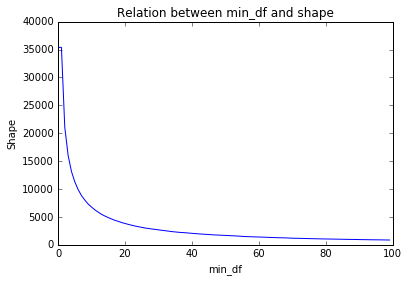

In [8]:
#The plotting result clearly indicates that the feature numbers decreased exponentially once the min_df increases.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

t = np.arange(len(y))
plt.plot(t, y)
plt.xlabel("min_df")
plt.ylabel("Shape")
  
plt.title("Relation between min_df and shape")
plt.show()

max_df means: When building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words). 
* If float, the parameter represents a proportion of documents, integer absolute counts. 
* When max_df is smaller, the shape of vectorized result is smaller and we will get less features.


In [17]:
#min_df and n_gram_range were fixed, and a systematic screening of man_df value from 0 to 1000 was performed. 
max_df_y =[]
l= np.arange(1,1000,10)

for i in l:
    vect =TfidfVectorizer(decode_error='ignore',min_df=1, max_df=i, ngram_range = (1,1))
    X_train_tf2 = vect.fit_transform(docs_train)
    max_df_y.append(X_train_tf2.shape[1])
print(max_df_y)

[14308, 29522, 31872, 32851, 33416, 33754, 34021, 34222, 34353, 34458, 34541, 34617, 34677, 34753, 34810, 34857, 34895, 34927, 34949, 34976, 34997, 35012, 35032, 35046, 35067, 35082, 35092, 35102, 35113, 35122, 35131, 35139, 35148, 35155, 35160, 35169, 35177, 35183, 35191, 35195, 35199, 35202, 35205, 35213, 35220, 35226, 35234, 35240, 35245, 35247, 35254, 35258, 35263, 35267, 35267, 35268, 35272, 35278, 35281, 35282, 35284, 35287, 35287, 35292, 35296, 35296, 35298, 35300, 35302, 35303, 35307, 35307, 35311, 35312, 35316, 35317, 35317, 35318, 35318, 35320, 35324, 35326, 35331, 35333, 35335, 35335, 35337, 35337, 35337, 35338, 35339, 35339, 35339, 35340, 35340, 35341, 35342, 35342, 35343, 35345]


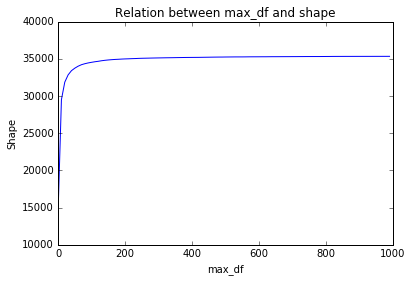

In [20]:
#The plotting result clearly indicates that the feature numbers increased exponentially once the max_df increases.
x_len = np.arange(len(max_df_y))
plt.plot(x_len*10,max_df_y)
plt.xlabel("max_df")
plt.ylabel("Shape")
  
plt.title("Relation between max_df and shape")
plt.show()

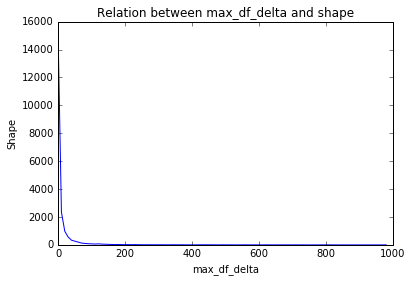

In [22]:
max_df_delta =[]
for i in range(len(max_df_y)-1):
    max_df_delta.append(max_df_y[i+1]-max_df_y[i])
    
x_len2 = np.arange(len(max_df_delta))

plt.plot(x_len2*10,max_df_delta)
plt.xlabel("max_df_delta")
plt.ylabel("Shape")
  
plt.title("Relation between max_df_delta and shape")
plt.show()
    

* n-gram: in the fields of computational linguistics and probability, an n-gram is a contiguous sequence of n items from a given sequence of text or speech.
* ngram_range means: The lower and upper boundary of the range of n-values for different n-grams to be extracted. 
* When upper boundary of ngram_range is larger, the shape of vectorized result is larger and we will get more features.

In [15]:
#A combination set of {(1,1), (2,2), (3,3), (4,4), (1,2), (2,3), (3,4), (1,3), (2,4), (1,4)} was searched one by one with fixed values of min_df and max_df.  
t=[(1,1),(2,2),(3,3),(4,4),(1,2),(2,3),(3,4),(1,3),(2,4),(1,4)]
for i in t:
    vect =TfidfVectorizer(decode_error='ignore',min_df=1, max_df=1.0, ngram_range = i)
    X_train_tf = vect.fit_transform(docs_train)

    print('ngram_range - %s; shape - %s;'
                 % (i, X_train_tf.shape[1]))

ngram_range - (1, 1); shape - 35394;
ngram_range - (2, 2); shape - 401280;
ngram_range - (3, 3); shape - 765125;
ngram_range - (4, 4); shape - 897186;
ngram_range - (1, 2); shape - 436674;
ngram_range - (2, 3); shape - 1166405;
ngram_range - (3, 4); shape - 1662311;
ngram_range - (1, 3); shape - 1201799;
ngram_range - (2, 4); shape - 2063591;
ngram_range - (1, 4); shape - 2098985;


*------------------------

## Problem 3 (20 points): Machine learning algorithms


* Based upon Problem 2 pick some parameters for TfidfVectorizer
    * "fit" your TfidfVectorizer using docs_train
    * Compute "Xtrain", a Tf-idf-weighted document-term matrix using the transform function on docs_train
    * Compute "Xtest", a Tf-idf-weighted document-term matrix using the transform function on docs_test
    * Note, be sure to use the same Tf-idf-weighted class (**"fit" using docs_train**) to transform **both** docs_test and docs_train
* Examine two classifiers provided by scikit-learn 
    * LinearSVC
    * KNeighborsClassifier
    * Try a number of different parameter settings for each and judge your performance using a confusion matrix (see Problem 1 for an example).
* Does one classifier, or one set of parameters work better?
    * Why do you think it might be working better?
* For a particular choice of parameters and classifier, look at 2 examples where the prediction was incorrect.
    * Can you conjecture on why the classifier made a mistake for this prediction?

In [10]:
vect =TfidfVectorizer(decode_error='ignore',ngram_range=(1,2),min_df=10, max_df=0.75)
Xtrain = vect.fit_transform(docs_train)
Xtest = vect.transform(docs_test)
print(Xtrain.shape)
print(Xtest.shape)

(1501, 16670)
(501, 16670)


In [15]:
parameters = {
        'vect__max_df': [0.5, 0.75, 1.0],
        'vect__ngram_range': [(1, 1), (2, 2),(1,2),(1,3),(1,4),(2,4)],  # unigrams or bigrams
        'vect__min_df': [1,2,4,8,16,32]
        }

In [16]:
#the SVM classifier with the error penalty parameter C to be 1000
pipeline = Pipeline([
        ('vect', TfidfVectorizer(decode_error='ignore')),
        ('clf', LinearSVC(C=1000)),
    ])

In [29]:
grid_search = GridSearchCV(pipeline, parameters, n_jobs=1)    
grid_search.fit(docs_train, y_train)



GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='ignore',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
  ...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'vect__max_df': [0.5, 0.75, 1.0], 'vect__ngram_range': [(1, 1), (2, 2), (1, 2), (1, 3), (1, 4), (2, 4)], 'vect__min_df': [1, 2, 4, 8, 16, 32]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [30]:
n_candidates = len(grid_search.cv_results_['params'])
for i in range(n_candidates):
    print(i, 'params - %s; mean - %0.2f; std - %0.2f'
          % (grid_search.cv_results_['params'][i],
             grid_search.cv_results_['mean_test_score'][i],
             grid_search.cv_results_['std_test_score'][i]))

0 params - {'vect__max_df': 0.5, 'vect__ngram_range': (1, 1), 'vect__min_df': 1}; mean - 0.82; std - 0.02
1 params - {'vect__max_df': 0.5, 'vect__ngram_range': (2, 2), 'vect__min_df': 1}; mean - 0.75; std - 0.05
2 params - {'vect__max_df': 0.5, 'vect__ngram_range': (1, 2), 'vect__min_df': 1}; mean - 0.81; std - 0.04
3 params - {'vect__max_df': 0.5, 'vect__ngram_range': (1, 3), 'vect__min_df': 1}; mean - 0.75; std - 0.07
4 params - {'vect__max_df': 0.5, 'vect__ngram_range': (1, 4), 'vect__min_df': 1}; mean - 0.69; std - 0.11
5 params - {'vect__max_df': 0.5, 'vect__ngram_range': (2, 4), 'vect__min_df': 1}; mean - 0.66; std - 0.10
6 params - {'vect__max_df': 0.5, 'vect__ngram_range': (1, 1), 'vect__min_df': 2}; mean - 0.82; std - 0.02
7 params - {'vect__max_df': 0.5, 'vect__ngram_range': (2, 2), 'vect__min_df': 2}; mean - 0.77; std - 0.01
8 params - {'vect__max_df': 0.5, 'vect__ngram_range': (1, 2), 'vect__min_df': 2}; mean - 0.83; std - 0.04
9 params - {'vect__max_df': 0.5, 'vect__ngram_

In [31]:
print(grid_search.best_score_)
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, grid_search.best_params_[param_name]))   
y_predicted = grid_search.predict(docs_test)    
print(metrics.classification_report(y_test, y_predicted,
                                         target_names=dataset.target_names))

cm = metrics.confusion_matrix(y_test, y_predicted)
print(cm)

0.846102598268
vect__max_df: 0.75
vect__min_df: 8
vect__ngram_range: (1, 3)
             precision    recall  f1-score   support

        neg       0.83      0.87      0.85       236
        pos       0.88      0.85      0.86       265

avg / total       0.86      0.86      0.86       501

[[205  31]
 [ 41 224]]


In [31]:
#the SVM classifier with the error penalty parameter C to be [1, 500 ,1000]
pipeline = Pipeline([
        ('vect', TfidfVectorizer(decode_error='ignore')),
        ('clf', LinearSVC()),
    ])

In [30]:
parameters = {
        'vect__max_df': [0.5, 0.75],
        'vect__ngram_range': [(1,2),(1,3)],  # unigrams or bigrams
        'vect__min_df': [8],
        'clf__C': [1,500,1000],
        }

In [32]:
grid_search = GridSearchCV(pipeline, parameters, n_jobs=1)
grid_search.fit(docs_train, y_train)


GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='ignore',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
  ...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'vect__ngram_range': [(1, 2), (1, 3)], 'clf__C': [1, 500, 1000], 'vect__max_df': [0.5, 0.75], 'vect__min_df': [8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [33]:
print(grid_search.best_score_)
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, grid_search.best_params_[param_name]))   
y_predicted = grid_search.predict(docs_test)    
print(metrics.classification_report(y_test, y_predicted,
                                         target_names=dataset.target_names))

cm = metrics.confusion_matrix(y_test, y_predicted)
print(cm)

0.859427048634
clf__C: 1000
vect__max_df: 0.75
vect__min_df: 8
vect__ngram_range: (1, 2)
             precision    recall  f1-score   support

        neg       0.83      0.85      0.84       232
        pos       0.87      0.86      0.86       269

avg / total       0.85      0.85      0.85       501

[[197  35]
 [ 39 230]]


In [40]:
import pandas as pd
from pandas import Series, DataFrame
Frame = DataFrame(grid_search.cv_results_)
Frame.to_csv('LineSVC_grid_search')


In [10]:
from sklearn.neighbors import KNeighborsClassifier as KNC

In [12]:
#The KNN classifier with n_neighbors set to be 20
pipeline_KNC = Pipeline([
        ('vect', TfidfVectorizer(decode_error='ignore')),
        ('clf', KNC(n_neighbors = 20)),
        ])

In [13]:
grid_search_KNC = GridSearchCV(pipeline_KNC, parameters, n_jobs=1)    
grid_search_KNC.fit(docs_train, y_train)


GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='ignore',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
  ...wski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform'))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'vect__ngram_range': [(1, 1), (2, 2), (1, 2), (1, 3), (1, 4), (2, 4)], 'vect__max_df': [0.5, 0.75, 1.0], 'vect__min_df': [1, 2, 4, 8, 16, 32]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [14]:
import pandas as pd
from pandas import Series, DataFrame
Frame_KNC = DataFrame(grid_search_KNC.cv_results_)
Frame_KNC.to_csv('KNC_grid_search')

In [16]:
n_candidates = len(grid_search_KNC.cv_results_['params'])
for i in range(n_candidates):
    print(i, 'params - %s; mean - %0.2f; std - %0.2f'
          % (grid_search_KNC.cv_results_['params'][i],
             grid_search_KNC.cv_results_['mean_test_score'][i],
             grid_search_KNC.cv_results_['std_test_score'][i]))

0 params - {'vect__ngram_range': (1, 1), 'vect__max_df': 0.5, 'vect__min_df': 1}; mean - 0.70; std - 0.02
1 params - {'vect__ngram_range': (2, 2), 'vect__max_df': 0.5, 'vect__min_df': 1}; mean - 0.72; std - 0.01
2 params - {'vect__ngram_range': (1, 2), 'vect__max_df': 0.5, 'vect__min_df': 1}; mean - 0.70; std - 0.02
3 params - {'vect__ngram_range': (1, 3), 'vect__max_df': 0.5, 'vect__min_df': 1}; mean - 0.71; std - 0.03
4 params - {'vect__ngram_range': (1, 4), 'vect__max_df': 0.5, 'vect__min_df': 1}; mean - 0.71; std - 0.03
5 params - {'vect__ngram_range': (2, 4), 'vect__max_df': 0.5, 'vect__min_df': 1}; mean - 0.73; std - 0.01
6 params - {'vect__ngram_range': (1, 1), 'vect__max_df': 0.5, 'vect__min_df': 2}; mean - 0.70; std - 0.03
7 params - {'vect__ngram_range': (2, 2), 'vect__max_df': 0.5, 'vect__min_df': 2}; mean - 0.71; std - 0.01
8 params - {'vect__ngram_range': (1, 2), 'vect__max_df': 0.5, 'vect__min_df': 2}; mean - 0.70; std - 0.02
9 params - {'vect__ngram_range': (1, 3), 'vect

In [15]:
print(grid_search_KNC.best_score_)
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, grid_search_KNC.best_params_[param_name]))   
y_predicted = grid_search_KNC.predict(docs_test)    
print(metrics.classification_report(y_test, y_predicted,
                                         target_names=dataset.target_names))

cm = metrics.confusion_matrix(y_test, y_predicted)
print(cm)

0.733022636485
vect__max_df: 0.5
vect__min_df: 2
vect__ngram_range: (2, 4)
             precision    recall  f1-score   support

        neg       0.74      0.77      0.75       248
        pos       0.76      0.74      0.75       253

avg / total       0.75      0.75      0.75       501

[[190  58]
 [ 66 187]]


In [18]:
parameters2 = {
        'vect__max_df': [0.5, 0.75],
        'vect__ngram_range': [(1, 1), (2, 2),(1,2),(1,3),(1,4),(2,4)],  # unigrams or bigrams
        'vect__min_df': [1,2,4,8,16]
        }

In [19]:
#The KNN classifier with n_neighbors set to be 5
pipeline_KNC2 = Pipeline([
        ('vect', TfidfVectorizer(decode_error='ignore')),
        ('clf', KNC(n_neighbors = 5)),
        ]) 

In [20]:
grid_search_KNC2 = GridSearchCV(pipeline_KNC2, parameters2, n_jobs=1)    
grid_search_KNC2.fit(docs_train, y_train)


GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='ignore',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
  ...owski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'vect__ngram_range': [(1, 1), (2, 2), (1, 2), (1, 3), (1, 4), (2, 4)], 'vect__max_df': [0.5, 0.75], 'vect__min_df': [1, 2, 4, 8, 16]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [21]:
Frame_KNC2 = DataFrame(grid_search_KNC2.cv_results_)
Frame_KNC2.to_csv('KNC_grid_search2')

In [23]:
n_candidates = len(grid_search_KNC2.cv_results_['params'])
for i in range(n_candidates):
    print(i, 'params - %s; mean - %0.2f; std - %0.2f'
          % (grid_search_KNC2.cv_results_['params'][i],
             grid_search_KNC2.cv_results_['mean_test_score'][i],
             grid_search_KNC2.cv_results_['std_test_score'][i]))

0 params - {'vect__ngram_range': (1, 1), 'vect__max_df': 0.5, 'vect__min_df': 1}; mean - 0.63; std - 0.01
1 params - {'vect__ngram_range': (2, 2), 'vect__max_df': 0.5, 'vect__min_df': 1}; mean - 0.67; std - 0.00
2 params - {'vect__ngram_range': (1, 2), 'vect__max_df': 0.5, 'vect__min_df': 1}; mean - 0.64; std - 0.00
3 params - {'vect__ngram_range': (1, 3), 'vect__max_df': 0.5, 'vect__min_df': 1}; mean - 0.65; std - 0.01
4 params - {'vect__ngram_range': (1, 4), 'vect__max_df': 0.5, 'vect__min_df': 1}; mean - 0.65; std - 0.00
5 params - {'vect__ngram_range': (2, 4), 'vect__max_df': 0.5, 'vect__min_df': 1}; mean - 0.68; std - 0.01
6 params - {'vect__ngram_range': (1, 1), 'vect__max_df': 0.5, 'vect__min_df': 2}; mean - 0.62; std - 0.01
7 params - {'vect__ngram_range': (2, 2), 'vect__max_df': 0.5, 'vect__min_df': 2}; mean - 0.67; std - 0.01
8 params - {'vect__ngram_range': (1, 2), 'vect__max_df': 0.5, 'vect__min_df': 2}; mean - 0.64; std - 0.00
9 params - {'vect__ngram_range': (1, 3), 'vect

In [24]:
print(grid_search_KNC2.best_score_)
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, grid_search_KNC2.best_params_[param_name]))   
y_predicted = grid_search_KNC2.predict(docs_test)    
print(metrics.classification_report(y_test, y_predicted,
                                         target_names=dataset.target_names))

cm = metrics.confusion_matrix(y_test, y_predicted)
print(cm)

0.681757656458
vect__max_df: 0.75
vect__min_df: 2
vect__ngram_range: (2, 4)
             precision    recall  f1-score   support

        neg       0.73      0.62      0.67       248
        pos       0.67      0.77      0.72       253

avg / total       0.70      0.70      0.69       501

[[154  94]
 [ 58 195]]


In [4]:
from sklearn.model_selection import train_test_split

vectorizer = TfidfVectorizer(decode_error='ignore',max_df=0.75, min_df=8,ngram_range=(1, 3))
vectors = vectorizer.fit_transform(dataset.data)
print(vectors.shape)

docs_train, docs_test, y_train, y_test = train_test_split(
        vectors, dataset.target, test_size=0.25, random_state=None)

print(docs_train.shape)

(2002, 34146)
(1501, 34146)


In [7]:
#The GaussianNB classifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
docs_test, 


gnb = GaussianNB()
y_pred = gnb.fit(docs_train.toarray(), y_train).predict(docs_test.toarray())

cm = metrics.confusion_matrix(y_test, y_pred)
print(metrics.classification_report(y_test, y_pred,
                                         target_names=dataset.target_names))
print(cm)


             precision    recall  f1-score   support

        neg       0.78      0.63      0.70       254
        pos       0.68      0.82      0.74       245

avg / total       0.73      0.72      0.72       499

[[159  95]
 [ 44 201]]


In [ ]:
#Finding two examples with wrong prediction and save them.
f = open("twoBadExamples.txt", 'wb')
flag = 0
for i in range(100):
    y_predicted = clf.predict(vectors_test[i])
    if y_predicted != y_test[i]:
        print(i)
        print("actural y: %d" %y_test[i])
        print("predict y: %d" %y_predicted)
        print(docs_test[i])
        f.write(docs_test[i])
        flag += 1
    if flag >= 2:
        break
f.close()


* actural y: 1
predict y: 0
b' " love is the devil " is a challenging film , munundating its audience with wild imagery and a plot structure that disallows a plot , perhaps in an attempt to get us to know the artist's psyche rather than the artist's lifeline . watching it , i was enthralled with the look of the film , the way the director shot everything like it was looking through a bizarre , personalized filter . everything looks like it is not how life looks like but how painter francis bacon , the film's subject , looked at it personally . but while i was engrossed , i stumbled upon my thoughts halfway through the film , awakened from my trance by some inner distraction , and began to try and follow what's going on . exactly what was i looking at ? watching this film , i wasn't sure if it was the most insightful film i had ever seen or the most vacuous . directed ( and written ) by john maybury , " love is the devil " is stylish masterpiece for the senses . everything looks originally bizarre and perplexing . the camera angles are ferociously askew , and the close-ups are uncomfortably too close . the editing is deft , occasionally cutting away to something bizarre every couple seconds , but other times holding on a shot for so long that you wonder if the audience is not supposed to be voyeurs , or rather , intruders to bacon's world and psyche . as such , there is no real story . i've not heard much about francis bacon that i didn't read prior to the film , but what i learned was this : he was a painter in england who reached his peak during the 60s and 70s , drawing hideously bizarre drawings of carnage and the like . he was one of the first to really come out of the closet , and in interviews , he was notoriously drunk yet incredibly witty . as played by great shakesperean actor derek jacobi , he's like a foppish and self-absorbed cross between oscar wilde and nero . he lives life the way he wants to live it , to the disatisfaction of those who have the privelege of being really close to him . it's as if he were taking delight in the destruction of others and maybe himself ( " champagne for my real friends , and pain for my sham friends , " he says one night at the bar he frequents ) .  " love is the devil " chronicles the latter part of his life . bacon , well-known in his mid-life , awakens one night when he hears a man tumble through his ceiling window and land on the floor . he walks in , unafraid of what he finds , and discovers a thief , george dyer ( daniel craig ) . bacon gives him an offer : if he spends the night with him , he can take anything he wants in the morning . george agrees to this , and off to bed he goes , but ends up staying with him , for whatever reason . the film shows their lives together , at least in reference to one another . while creating bacon's world of friends ( like " high art , " this film minors in showing a certain group of people who radiate a connection that is not shown but is understood ) , the film shows the relationship of bacon and george as it remains rather stagnant . bacon is haughty and bizarre ; george is simple and doesn't understand bacon in the least , especially not his paintings . while watching this , that's basically all i thought was there . the film has a hypnotic feel , free of any restraints of form , and is shot so uniquely that i felt my attention was almost entirely on the way this film was made rather than what it is about . once the film is over , it's easier to piece it together . i kept on thinking about this film , wondering what the point to all of it was . someone doesn't merely make a film of all style and no substance at all , and if they do , they do it by accident , but still allow some substance to creep in . thinking about it , i remembered how the two fed off of eachother . i thought about how bacon was a masochist , in love with cruelty ( in one scene , he watches a boxing match with a orgiastic delight , and lets out a squeal of pleasure when blood from the one boxer's head splashes across his face ; in another scene , he masturbates to the odessa steps sequence of eisenstein's " battleship potemkin " ) , and perhaps he drove george too far in his delight for pain . he drove him over the edge , and for him that was love , even if it wasn't for george . i guess that explains the title . a bit . that's great and all , but i almost wish the film was devoid of any meaning . i wish it hadn't reduced itself to making some point about humanity , about how love is the most selfish thing in the world ( and it is , if you look at it a certain way ) . or maybe if it had avoided any meaning about humanity and merely drove itself into being the one film that was truly inside one man's twisted pysche . it's almost always best to obtain insights from looking at one man's uniqueness than it is forcing universality down an audience's throat . that way you don't reduce your film to something it's just not . i can't say i totally enjoyed " love is the devil , " though . despite all of the things i respect about this movie , it's still rather uncomfortable to sit through . even at a normally trite length of ninety minutes , the film still seems like an arduous task to sit through , especially after an exhausting first hour . though hypnotic , it still almost seems gimmicky and even redundant at times , as if it were taking advantage of one man's truly bizarre nature but not doing anything deeper with it . as such , i respect the way the film looks . it's beautiful and painstakingly crafted so that , along with " what dreams may come " and " dark city , " it's the year's most visually stunning film . in fact , if a better script had been forged , i'd almost compare it in visual power to a peter greenaway film , complete with similar haunting images that stick in the mind forever . and with a dymanite performance by derek jacobi , it has the comic and distanced tone that it needs . i just wish it had been more than mostly style and just a hair bit of substance . then i would have had something to hold me over even now . '
* 3		
actural y: 0
predict y: 1
nathaniel r . atcheson a fellow critic once stated his belief that a reviewer should not speak of himself in his own review . i've attempted to obey this rule in recent months , but to do so would be impossible in this case . the fact is , nearly every person who goes to see the phantom menace brings baggage in with them . the original star wars trilogy means so much to so many people . for me , they calibrated my creativity as a child ; they are masterful , original works of art that mix moving stories with what were astonishing special effects at the time ( and they still hold up pretty darn well ) . i am too young to have seen star wars in the theater during its original release , but that doesn't make me any less dedicated to it . on the contrary , the star wars trilogy -- and the empire strikes back in particular -- are three items on a very short list of why i love movies . when i heard that george lucas would be making the first trilogy in the nine-film series , i got exited . when i first saw screenshots from the film , well over a year ago , i embarked on a year-long drool of anticipation . and when the first previews were released last thanksgiving , i was ready to see the film . but then there was the hype , the insane marketing campaign , and lucasfilm's secretive snobbery over the picture . in the last weeks before the picture opened , while multitudes of fans waited outside of theaters and stood in the boiling sun days in advance just to be the first ones in the theater , i was tired of hearing about it . i was tired of seeing cardboard cut-outs of the characters whenever i went to kfc or taco bell . i just wanted to see the movie . reader , do not misunderstand . i did not have an anti-hype reaction . the hype was unavoidable . i understand and accept the hype -- it's just what happens when the prequel to the most widely beloved films of all time get released . five minutes into the phantom menace , i knew there was a problem .  " who are these jedi knights ? " i asked .  " why are they churning out stale dialogue with machine-gun rapidity ? "  " why aren't these characters being developed before their adventures ? "  " why is there a special effects shot in nearly every frame of the entire film ? " these were just some of my questions early on . later , i asked , " where's the magic of the first three films ? " and " why am i looking at my watch every fifteen minutes ? ' by the end of the film , i was tired , maddened , and depressed . george lucas has funneled his own wonderful movies into a pointless , mindless , summer blockbuster . the phantom menace is no star wars film . take away the title and the jedi talk and the force , and you're left with what is easily one of the most vacuous special effects movies of all time . it's an embarrassment . i looked desperately for a scene in which a character is explored , or a new theme is examined , or a special effects shot isn't used . there are a few of each , but they're all token attempts . the fact is , george lucas has created what is simultaneously an abysmally bad excuse for a movie and a pretty good showcase for digital effects . this is not what i wanted to see . i didn't want to leave the phantom menace with a headache and a bitter taste in my mouth , but i did . the story centers mostly around qui-gon jinn ( liam neeson , looking lost and confused ) and his apprentice , obi-wan kenobi ( ewan mcgregor , who scarcely has a line in the film ) and their attempts to liberate the people of the planet naboo . naboo is the victim of a bureaucratic war with the trade federation ; their contact on naboo is queen amidala ( natalie portman ) , the teenage ruler who truly cares for her people . after picking up jar jar binks ( a completely cgi character , voiced by ahmed best ) , they head to tatooine , where they meet young anakin skywalker ( jake lloyd ) and his mother ( pernilla august ) . qui-gon knows that the force is strong with young anakin , and so the jedi knights take the boy with them on their journeys . the bad guys are darth maul and darth sidious , neither of whom have enough lines to register as characters . there isn't anything particularly wrong with this story when looking at it in synopsis form . the way lucas has handled it , however , it unsatisfactory . first of all , we don't learn one single thing about qui-gon jinn . not one thing . what was his life like before this film ? well , i imagine he didn't have one . that's why he feels like a plot device . this probably explains why neeson looks so hopeless in the role , and why he's recently retired from film ( i don't blame him , honestly ) . obi-wan , a character i was really looking forward to learning more about , is even less interesting . mcgregor has just a few lines , so anyone hoping to see the engaging young actor in a great performance is urged to look elsewhere . since these two men are the focus of the phantom menace , lucas has served us a big emotional void as the centerpiece of his movie . things start to pick up when our characters reach tatooine ; young anakin is perhaps the only truly fleshed-out character in the film , and lloyd does a thoughtful job with the role . i was also hugely impressed with the sand speeder scene ; rarely is an action sequence so fast and so exciting . and when anakin says goodbye to his mother , i found it moving . also fairly good is portman , and she manages to give a little depth to a character where no depth has been written . jar jar binks is one of the most annoying characters i've ever had to endure , but he's more interesting than most of the humans . as soon as the relatively-brief segment on tatooine is over , it's back to the mind-numbing special effects and depthless action scenes . i've seen many movies that qualify as " special effects extravaganzas , " but the phantom menace is the first one i've seen that had me sick of the special effects fifteen minutes into the movie . the reason is obvious : george lucas has no restraint . i can't say that i didn't find the effects original , because i did -- the final battle between darth maul , obi-wan , and qui-gon is visually exceptional , as is most of the film . but i also found the effects deadening and tiresome . my breaking point was near the end of the picture , as anakin is getting questioned by yoda and the other jedi masters ; in the background , we see hundreds of digital spaceships flying around through a digital sky , and i wanted that to go away . can't we have one stinking scene that isn't bursting at the seems with a special effects shot ? i got so sick of looking at the cgi characters and spaceships and planets and backgrounds that i really just wanted to go outside and look at a physical landscape for a few hours . and then there's the question of magic . what was lost in the sixteen years between the phantom menace and return of the jedi ? i have a feeling that lucas was so focused on how his movie looked that he forgot entirely the way it should feel . john williams' familiar score is no help , nor is lucas' direction . i think it comes right down to characters : there are none here . i longed for the magnetic presence of han , luke , and leia , but i got no such thing . and what about the ridiculous expectations ? mine weren't that high ; i simply wanted a film that showed me the roots of the films that i grew up loving , a story that had a few characters and a few great special effects . instead , i got two hours and fifteen minutes of a lifeless and imaginative computer graphics show . i don't hate the phantom menace as much as i resent it : i'd like to forget that it exists , and yet i can't . it's here to stay . i can only hope that episodes ii and iii have something of substance in them , because if they don't , then lucas will have pulled off the impossible task of destroying his own indestructible series . '

In [ ]:
#Analysis of reasons why the prediction is wrong.

* Two Wrong Prediction Examples: We picked two examples from all the incorrect prediction results to analyze why the prediction is wrong. The first example is review for movie “Love is devil”. The actual sentiment of the review is positive, whereas the prediction estimates the review to be negative. By reading the review context carefully, we believed it is because the review used many sentimentally negative words to describe the abnormal personality of the main character in the movie. But overall the review appraises the movie to be well-done. The second example is review for movie “Star Wars the Phantom Menace”. Our prediction is positive but the actual sentiment is not. We believed in this case, the reason is that a large portion of the review is written about how good the previous Star Wars movies are. The algorithm could not tell whether these positive words is to this movie or previous movies.

*------------------------

## Problem 4 (20 points): Open Ended Question:  Finding the right plot

* Can you find a two dimensional plot in which the positive and negative reviews are separated?
    * This problem is hard since you will likely have thousands of features for review, and you will need to transform these thousands of features into just two numbers (so that you can make a 2D plot).
* Note, I was not able to find such a plot myself!
    * So, this problem is about **trying** but perhaps **not necessarily succeeding**!
* I tried two things, neither of which worked very well.
    * I first plotted the length of the review versus the number of features we compute that are in that review
    * Second I used Principle Component Analysis on a subset of the features.
* Can you do better than I did!?

In [9]:
#Using PCA for dimensional reduction with all features in data
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_r = pca.fit(vectors.toarray()).transform(vectors.toarray())

In [10]:
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

explained variance ratio (first two components): [ 0.00412175  0.00374217]


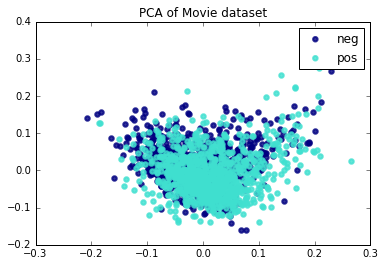

In [13]:
%matplotlib inline
plt.figure()
colors = ['navy', 'turquoise']
lw = 2
target_names=dataset.target_names
y = dataset.target

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of Movie dataset')

In [6]:
# Using SelectKBest method to choose 600 best features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif

X, y = vectors.toarray(), dataset.target
print(X.shape)

X_new = SelectKBest(f_classif, k=600).fit_transform(X, y)
X_new.shape


(2002, 34146)


(2002, 600)

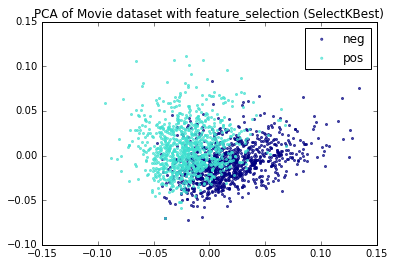

In [15]:
#Using PCA for dimensional reduction with 600 best features selected by SelectKBest method
%matplotlib inline
pca = PCA(n_components=2)
X_r3 = pca.fit(X_new).transform(X_new)

plt.figure()
colors = ['navy', 'turquoise']
lw = 2

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_r3[y == i, 0], X_r3[y == i, 1], s=1, color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of Movie dataset with feature_selection (SelectKBest)')

(2000, 3827)
1000
1000


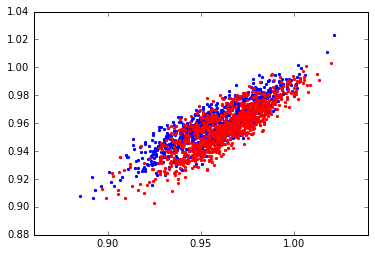

In [3]:
#Using k-Means for dimensional reduction with all features in data
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import load_files
from sklearn.cluster import KMeans


categories = ['neg', 'pos']
movie_reviews_data_folder = 'txt_sentoken'
dataset = load_files(movie_reviews_data_folder, categories=categories, shuffle=True)
target_names = dataset.target_names


vectorizer = TfidfVectorizer(decode_error='ignore',max_df=0.5, min_df=50,ngram_range=(1, 2))
vectors = vectorizer.fit_transform(dataset.data)
print(vectors.shape)

y = dataset.target

clf = KMeans(n_clusters=2)
clf.fit(vectors)
centroids = clf.cluster_centers_
centroid_0 = centroids[0]
centroid_1 = centroids[1]

neg = vectors[y==0].toarray()
pos = vectors[y==1].toarray()
print(len(neg))
print(len(pos))

neg_distance_c0 = []
neg_distance_c1 = []
pos_distance_c0 = []
pos_distance_c1 = []

for i in range(1000):
	neg_distance_c0.append(np.linalg.norm(neg[i]-centroid_0))
	neg_distance_c1.append(np.linalg.norm(neg[i]-centroid_1))
	pos_distance_c0.append(np.linalg.norm(pos[i]-centroid_0))
	pos_distance_c1.append(np.linalg.norm(pos[i]-centroid_1))
	
plt.scatter(neg_distance_c0, neg_distance_c1, color='blue', s=5)
plt.scatter(pos_distance_c0, pos_distance_c1, color='red', s=5)
plt.show()

In [4]:
# Using SelectKBest method to choose 20 best features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif

X, y = vectors.toarray(), dataset.target
X.shape

X_new = SelectKBest(f_classif, k=20).fit_transform(X, y)
X_new.shape

(2000, 20)

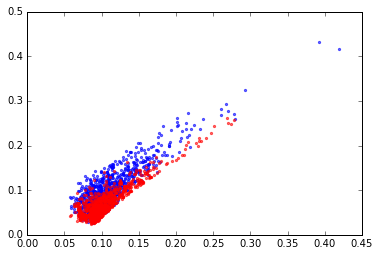

In [5]:
#Using k-Means for dimensional reduction with 20 best features selected by SelectKBest method
%matplotlib inline
from sklearn.cluster import KMeans
import numpy as np
clf = KMeans(n_clusters=2)
clf.fit(X_new)
centroids = clf.cluster_centers_
centroid_0 = centroids[0]
centroid_1 = centroids[1]

neg = X_new[y==0]
pos = X_new[y==1]

neg_distance_c0 = []
neg_distance_c1 = []
pos_distance_c0 = []
pos_distance_c1 = []

for i in range(1000):
	neg_distance_c0.append(np.linalg.norm(neg[i]-centroid_0))
	neg_distance_c1.append(np.linalg.norm(neg[i]-centroid_1))
	pos_distance_c0.append(np.linalg.norm(pos[i]-centroid_0))
	pos_distance_c1.append(np.linalg.norm(pos[i]-centroid_1))
	
plt.scatter(neg_distance_c0, neg_distance_c1, color='blue', s=5, alpha=0.6)
plt.scatter(pos_distance_c0, pos_distance_c1, color='red', s=5, alpha=0.6)
plt.show()

[810, 20257]


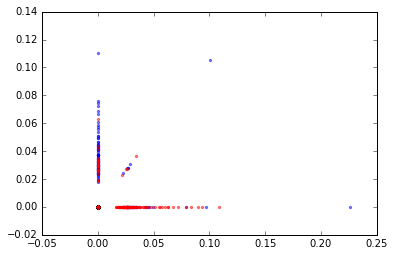

In [3]:
#trying to separate positive and negative reviews simply based on one representative positive word and one representative negative word
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_files
from sklearn import datasets
from sklearn.feature_extraction.text import TfidfVectorizer

categories = ['neg', 'pos']
movie_reviews_data_folder = 'txt_sentoken'
dataset = load_files(movie_reviews_data_folder, categories=categories, shuffle=True)
target_names = dataset.target_names

vectorizer = TfidfVectorizer(decode_error='ignore',max_df=0.70, min_df=10,ngram_range=(1, 3))
vectors = vectorizer.fit_transform(dataset.data)

feature_name_list = vectorizer.get_feature_names()

interesting_feature_labels = []

for i in range(len(feature_name_list)):
	if feature_name_list[i] == "amazing":
		interesting_feature_labels.append(i)

for i in range(len(feature_name_list)):
	if feature_name_list[i] == "terrible":
		interesting_feature_labels.append(i)
print(interesting_feature_labels)

X = vectors
y = dataset.target
X_neg = vectors[y==0].toarray()
X_pos = vectors[y==1].toarray()

plt.scatter([X_neg[i][interesting_feature_labels[0]] for i in range(1000)], [X_neg[i][interesting_feature_labels[1]] for i in range(1000)], color='blue', alpha=0.5, s=5)
plt.scatter([X_pos[i][interesting_feature_labels[0]] for i in range(1000)], [X_pos[i][interesting_feature_labels[1]] for i in range(1000)], color='red', alpha=0.5, s=5)
plt.show()

# Report: communicate the results (20 points)

(1) (5 points) What data you collected?

(2) (5 points) Why this topic is interesting or important to you? (Motivations)

(3) (5 points) How did you analyse the data?

(4) (5 points) What did you find in the data?
(please include figures or tables in the report, but no source code)

# Slides (for 10 minutes of presentation) (20 points)


1. (5 points) Motivation about the data collection, why the topic is interesting to you. 

2. (10 points) Communicating Results (figure/table)

3. (5 points) Story telling (How all the parts (data, analysis, result) fit together as a story?)

*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "ipython notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.


* **PPT Slides**: please prepare PPT slides (for 10 minutes' talk) to present about the case study . We will ask two teams which are randomly selected to present their case studies in class for this case study. 

* ** Report**: please prepare a report (less than 10 pages) to report what you found in the data.
    * What is the relationship between this topic and Business Intelligence?
    * How did you analyse the data?
    * What did you find in the data? 
    * What conjectures did you make and how did you support or disprove them using data?
    * Did you find anything suprising in the data?
    * What business decision do you think this data could help answer?  Why?

   (please include figures or tables in the report, **but no source code**)

*Please compress all the files into a single zipped file.*


** How to submit: **

        Send an email to rcpaffenroth@wpi.edu and wliu3@wpi.edu with the subject: "[DS501] Case study 3-TEAM NUMBER ???".